# Austin Animal Center Dog Adoptions

The purpose of this notebook is to import, inspect, clean, and prepare the data for analysis. The Austin Animal Center data comes in two CSV files, one for Intakes and one for Outcomes.

## 1. Library Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from IPython import display
from ipywidgets import interact, widgets

## 2. Importing animal intake and outcome data from the Austin Animal Center

The Austin Animal Center intake and outcome data is loaded into separate DataFrames and the basic exploratory functions are displayed to see the DataFrame shape and column information. The following Intake and Outcome csv files were downloaded from [the Official Austin Open Data Portal](https://data.austintexas.gov).

In [2]:
intake_raw = pd.read_csv('../raw_data/Austin_Animal_Center_Intakes.csv')
outcome_raw = pd.read_csv('../raw_data/Austin_Animal_Center_Outcomes.csv')

In [3]:
print('Intake_raw Dataframe shape: ', intake_raw.shape)
print('Outcome_raw Dataframe shape: ', outcome_raw.shape)

Intake_raw Dataframe shape:  (137740, 12)
Outcome_raw Dataframe shape:  (138039, 12)


In [4]:
intake_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137740 entries, 0 to 137739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         137740 non-null  object
 1   Name              96617 non-null   object
 2   DateTime          137740 non-null  object
 3   MonthYear         137740 non-null  object
 4   Found Location    137740 non-null  object
 5   Intake Type       137740 non-null  object
 6   Intake Condition  137740 non-null  object
 7   Animal Type       137740 non-null  object
 8   Sex upon Intake   137739 non-null  object
 9   Age upon Intake   137740 non-null  object
 10  Breed             137740 non-null  object
 11  Color             137740 non-null  object
dtypes: object(12)
memory usage: 12.6+ MB


In [5]:
outcome_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138039 entries, 0 to 138038
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138039 non-null  object
 1   Name              96906 non-null   object
 2   DateTime          138039 non-null  object
 3   MonthYear         138039 non-null  object
 4   Date of Birth     138039 non-null  object
 5   Outcome Type      138016 non-null  object
 6   Outcome Subtype   63057 non-null   object
 7   Animal Type       138039 non-null  object
 8   Sex upon Outcome  138038 non-null  object
 9   Age upon Outcome  138033 non-null  object
 10  Breed             138039 non-null  object
 11  Color             138039 non-null  object
dtypes: object(12)
memory usage: 12.6+ MB


In [6]:
intake_raw.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [7]:
outcome_raw.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


Our initial exploration shows that:
- The intake data has 137,740 entries and the outcome data has 138039 entries
- Both DataFrames share some similar columns that we will use to merge upon to create a single combined DataFrame. Columns such as 'Animal ID', 'Name', 'Animal Type', 'Breed', 'Color'. 
- We also notice that the column dtypes are all 'object'; we will need to change DateTime to a datetime object
- We also notice NaN entries that will need to be evaluated

## 3. Data Exploration

### 3.1 Exploring the data set for missing entries and resolving issues with improper data entry

Both data sets are explored to view which attributes have missing values and are evaluated on a case-by-case basic on how to approach each improper entry.

In [8]:
intake_missing = intake_raw.isnull().sum()
intake_missing.sort_values(ascending=False)

Name                41123
Sex upon Intake         1
Animal ID               0
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

We are missing quite a few entries for 'Name', which we will tend to ignore. Strays will not have names upon intake and named may also change upon failed adoptions or animal surrenders.

We see one null entry for 'Sex Upon Intake'. It is decided to remove that one entry as that statistic cannot be approximated correctly.

In [9]:
intake_clean = intake_raw[intake_raw['Sex upon Intake'].notnull()]
intake_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137739 entries, 0 to 137739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         137739 non-null  object
 1   Name              96616 non-null   object
 2   DateTime          137739 non-null  object
 3   MonthYear         137739 non-null  object
 4   Found Location    137739 non-null  object
 5   Intake Type       137739 non-null  object
 6   Intake Condition  137739 non-null  object
 7   Animal Type       137739 non-null  object
 8   Sex upon Intake   137739 non-null  object
 9   Age upon Intake   137739 non-null  object
 10  Breed             137739 non-null  object
 11  Color             137739 non-null  object
dtypes: object(12)
memory usage: 13.7+ MB


In [10]:
outcome_missing = outcome_raw.isnull().sum()
outcome_missing.sort_values(ascending=False)

Outcome Subtype     74982
Name                41133
Outcome Type           23
Age upon Outcome        6
Sex upon Outcome        1
Animal ID               0
DateTime                0
MonthYear               0
Date of Birth           0
Animal Type             0
Breed                   0
Color                   0
dtype: int64

The same is done for the outcome data set, revealing a few major points:
- There are 74982 null values for Outcome Subtypes and 41133 null Name values. The Outcomes Subtypes can sometimes have an entry that further categorizes the Outcome Type. This column will ultimately be removed due to irrelevance to the outcomes of a majority of the animals.
- There is 1 entry with a missing value for the 'Sex Upon Outcome' column that will be removed because we're unable to estimate the sex.
- There are 6 null entries for Age upon Outcome that are empty. We cannot approximate the age of outcome, so we decide to remove that as well.
- Lastly, there are 23 entries for Outcome type that are empty. We cannot approximate the outcome type so those were decided to be removed as well.

In [11]:
outcome_clean = outcome_raw[outcome_raw['Sex upon Outcome'].notnull()]
outcome_clean = outcome_clean[outcome_clean['Age upon Outcome'].notnull()]
outcome_clean = outcome_clean[outcome_clean['Outcome Type'].notnull()]
outcome_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138009 entries, 0 to 138038
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138009 non-null  object
 1   Name              96891 non-null   object
 2   DateTime          138009 non-null  object
 3   MonthYear         138009 non-null  object
 4   Date of Birth     138009 non-null  object
 5   Outcome Type      138009 non-null  object
 6   Outcome Subtype   63051 non-null   object
 7   Animal Type       138009 non-null  object
 8   Sex upon Outcome  138009 non-null  object
 9   Age upon Outcome  138009 non-null  object
 10  Breed             138009 non-null  object
 11  Color             138009 non-null  object
dtypes: object(12)
memory usage: 13.7+ MB


### 3.2 Combining intake and outcome data to get insight on the animals that appear in both data sets

We do a left merge on the two tables on the 'Animal ID', 'Name', 'Animal Type', 'Breed', 'Color' columns. 

This will keep all the original values of the Intake dataframe, while merging the entries and columns of the matching outcome columns.

In [12]:
column_names = ['Animal ID', 'Name', 'Animal Type', 'Breed', 'Color']
animal_merged_df = pd.merge(intake_clean, outcome_clean, on=column_names, \
                                   suffixes=('_intake', '_outcome'), how='left')

### 3.3 Cleaning the merged dataset to easier focus on exploring and finding trends in the data

#### 3.3.1 Subsetting data to focus on Dog entries that had a properly recorded intake and outcome

We filter the 'Animal Type' column for dog only entries by subsetting the 'Animal Type' columns and we remove duplicate entries.

In [13]:
dogs_merged_df = animal_merged_df[animal_merged_df['Animal Type']=='Dog']
dogs_nodups = dogs_merged_df.drop_duplicates(['Animal ID'], keep=False)
dogs_nodups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56464 entries, 0 to 178397
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Animal ID          56464 non-null  object
 1   Name               44232 non-null  object
 2   DateTime_intake    56464 non-null  object
 3   MonthYear_intake   56464 non-null  object
 4   Found Location     56464 non-null  object
 5   Intake Type        56464 non-null  object
 6   Intake Condition   56464 non-null  object
 7   Animal Type        56464 non-null  object
 8   Sex upon Intake    56464 non-null  object
 9   Age upon Intake    56464 non-null  object
 10  Breed              56464 non-null  object
 11  Color              56464 non-null  object
 12  DateTime_outcome   56108 non-null  object
 13  MonthYear_outcome  56108 non-null  object
 14  Date of Birth      56108 non-null  object
 15  Outcome Type       56108 non-null  object
 16  Outcome Subtype    21025 non-null  obje

#### 3.3.2 DateTime Column conversion from a object dtype to a datetime dtype to easier find date trends
We convert the 'DateTime_intake' and 'DateTime_outcome' columns to datetime dtypes using the pandas function **.to_datetime()**.

We also create a column for outcome month by extracting the month attribute from the datetime object column.

In [14]:
dogs_nodups = dogs_nodups[~dogs_nodups['Outcome Type'].isnull()]
dogs_nodups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56108 entries, 0 to 178389
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Animal ID          56108 non-null  object
 1   Name               43901 non-null  object
 2   DateTime_intake    56108 non-null  object
 3   MonthYear_intake   56108 non-null  object
 4   Found Location     56108 non-null  object
 5   Intake Type        56108 non-null  object
 6   Intake Condition   56108 non-null  object
 7   Animal Type        56108 non-null  object
 8   Sex upon Intake    56108 non-null  object
 9   Age upon Intake    56108 non-null  object
 10  Breed              56108 non-null  object
 11  Color              56108 non-null  object
 12  DateTime_outcome   56108 non-null  object
 13  MonthYear_outcome  56108 non-null  object
 14  Date of Birth      56108 non-null  object
 15  Outcome Type       56108 non-null  object
 16  Outcome Subtype    21025 non-null  obje

In [15]:

intake_dt = pd.to_datetime(dogs_nodups['DateTime_intake'])
dogs_nodups['dt_intake'] = intake_dt

outcome_dt = pd.to_datetime(dogs_nodups['DateTime_outcome'])
dogs_nodups['dt_outcome'] = outcome_dt

dogs_nodups['delta_time'] = outcome_dt - intake_dt

In [16]:
dogs_nodups['month_outcome'] = dogs_nodups['dt_outcome'].dt.month
dogs_nodups['year_outcome'] = dogs_nodups['dt_outcome'].dt.year

In [17]:
dogs_nodups['delta_time_s'] = dogs_nodups['delta_time']/datetime.timedelta(seconds=1)
dogs_nodups['delta_time_d'] = dogs_nodups['delta_time_s'] / 86400

In [18]:
dogs_nodups[dogs_nodups['delta_time_d']<0][['DateTime_intake', 'DateTime_outcome', 'delta_time']]

,DateTime_intake,DateTime_outcome,delta_time
108,04/27/2018 11:43:00 AM,04/27/2018 10:56:00 AM,-1 days +23:13:00
1876,12/23/2019 01:08:00 PM,12/23/2019 11:00:00 AM,-1 days +21:52:00
2005,06/27/2019 02:44:00 PM,06/27/2019 12:00:00 AM,-1 days +09:16:00
2138,04/26/2019 04:41:00 PM,04/26/2019 12:00:00 AM,-1 days +07:19:00
3129,06/27/2019 02:44:00 PM,06/27/2019 12:00:00 AM,-1 days +09:16:00
...,...,...,...
166884,11/18/2017 02:38:00 PM,11/18/2017 12:00:00 AM,-1 days +09:22:00
168109,03/30/2015 02:39:00 PM,03/30/2015 12:00:00 AM,-1 days +09:21:00
169390,10/10/2017 03:56:00 PM,10/10/2017 03:00:00 PM,-1 days +23:04:00
175059,01/11/2022 01:38:00 PM,01/11/2022 10:21:00 AM,-1 days +20:43:00


In [19]:
dogs_nodups = dogs_nodups[dogs_nodups['delta_time_d']>0]

In [20]:
dogs_nodups.head()

,Animal ID,Name,DateTime_intake,MonthYear_intake,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,Outcome Subtype,Sex upon Outcome,Age upon Outcome,dt_intake,dt_outcome,delta_time,month_outcome,year_outcome,delta_time_s,delta_time_d
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,Partner,Neutered Male,2 years,2019-01-03 16:19:00,2019-01-08 15:11:00,4 days 22:52:00,1,2019,427920.0,4.952778
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,NaN,Spayed Female,8 years,2015-07-05 12:59:00,2015-07-05 15:13:00,0 days 02:14:00,7,2015,8040.0,0.093056
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,NaN,Neutered Male,1 year,2016-04-14 18:43:00,2016-04-21 17:17:00,6 days 22:34:00,4,2016,599640.0,6.940278
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,NaN,Neutered Male,4 years,2014-06-29 10:38:00,2014-07-02 14:16:00,3 days 03:38:00,7,2014,272280.0,3.151389
5,A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,...,NaN,Neutered Male,2 years,2017-02-18 12:46:00,2017-02-21 17:44:00,3 days 04:58:00,2,2017,277080.0,3.206944


#### 3.3.3 Clean 'Age upon Outcome' column

The values for 'Age upon Outcome' column is a string with nonuniform and unexpected values, such as values in the negatives or zero.

In [21]:
dogs_nodups['Age upon Outcome'].value_counts().sort_index().head()

0 years      51
1 day        82
1 month    2167
1 week       90
1 weeks     228
Name: Age upon Outcome, dtype: int64

In [22]:
#Cleaning the age upon outcome column to be a deltatime, and adding another column for age in days (ints)

dogs_nodups = dogs_nodups.reset_index(drop=True)
timedeltas = []
days = []
for x in dogs_nodups['Age upon Outcome']:
    x = x.lower().replace(' ','')
    if 'year' in x or 'years' in x:
        x = x[:x.index('year')]
        days.append(int(x)*365)
        timedeltas.append(pd.to_timedelta(int(x)*365, unit='day'))
    elif 'month' in x or 'months' in x:
        x = x[:x.index('month')]
        days.append(int(x)*30)
        timedeltas.append(pd.to_timedelta(int(x)*30, unit='day'))
    elif 'week' in x or 'weeks' in x:
        x = x[:x.index('week')]
        days.append(int(x)*7)
        timedeltas.append(pd.to_timedelta(int(x)*7, unit='day'))
    elif 'day' in x or 'days' in x:
        x = x[:x.index('day')]
        days.append(int(x)*365)
        timedeltas.append(pd.to_timedelta(int(x), unit='day'))
    else:
        days.append(0)
        timedeltas.append(pd.to_timedelta(0, unit='day'))
        
dogs_nodups['age_td'] = pd.Series(timedeltas)
dogs_nodups['age_in_days'] = pd.Series(days)
dogs_nodups['age_in_years'] = dogs_nodups['age_in_days']/365

In [23]:
dogs_nodups['age_in_years'].value_counts().sort_index()

0.000000        51
0.019178       318
0.038356       220
0.057534       182
0.076712       285
0.082192      2167
0.095890        32
0.164384      5626
0.246575      1541
0.328767      1552
0.410959      1417
0.493151      1309
0.575342       788
0.657534      1112
0.739726       717
0.821918      1116
0.904110       397
1.000000     10014
2.000000     10305
3.000000      4001
4.000000      2332
5.000000      2310
6.000000      1559
7.000000      1324
8.000000      1350
9.000000       737
10.000000     1164
11.000000      447
12.000000      544
13.000000      360
14.000000      266
15.000000      206
16.000000      100
17.000000       46
18.000000       23
19.000000       14
20.000000        3
23.000000        1
24.000000        1
Name: age_in_years, dtype: int64

In [24]:
# Remove dogs with negative and zero ages
dogs_nodups = dogs_nodups[dogs_nodups['age_in_years']>0]

#### 3.3.4 Generalizing the breed column into more general breed categories

We can sort the breed mixes by general breed types, any noncategorized breed will be labeled as 'other'

In [25]:
dogs_nodups['Breed'].value_counts()

Pit Bull Mix                        5310
Labrador Retriever Mix              5279
Chihuahua Shorthair Mix             5190
German Shepherd Mix                 2346
Pit Bull                            1389
                                    ... 
Australian Shepherd/Dachshund          1
Beagle/Queensland Heeler               1
Bruss Griffon/Chihuahua Longhair       1
Australian Shepherd/Beagle             1
German Shorthair Pointer/Beagle        1
Name: Breed, Length: 2238, dtype: int64

In [26]:
def breed_check(breed):
    """ 
    Check the provided breed argument against a generalized and shortened list of the top 100 
    Most Popular Dog Breeds by the American Kennel Club. The list is organized by most popular
    to less popular breeds and the first match with the list will return that breed and all 
    uncategorized will have a value of 'Other' 
    https://www.akc.org/expert-advice/dog-breeds/most-popular-dog-breeds-of-2021/
    
    For example: If there was a dog that was listed as a Labrador Retriever/Golden Retriever mix,
    it would be categorized into the first choice of Labrador Retriever.
    
    """
    breed_list = ['Labrador Retriever', 'French Bulldog', 'Golden Retriever', 'German Shepherd', 
                  'Poodle', 'Bulldog', 'Pit Bull', 'Beagle', 'Rottweiler', 'Pointer', 'Dachshund', 
                  'Corgi', 'Australian Shepherd', 'Terrier', 'Boxer', 'Spaniel', 'Doberman', 
                  'Great Dane', 'Schnauzer', 'Husky', 'Shih Tzu', 'Pomeranian',
                  'Havanese', 'Sheepdog', 'Collie', 'Pug', 'Basset', 'Mastiff', 
                  'Chihuahua', 'Maltese', 'Weimaraners', 'Shiba Inu', 'Newfoundlands', 'Bichon',
                  'Dalmatian', 'Australian Cattle Dog', 'Akita', 'Papillon', 
                  'Whippet', 'Pointer', 'Great Pyrenees', 'Sharpei',  'Chow Chow', 'Basenji',
                  'Pekingese', 'Staffordshire', 'Miniature Pinscher', 'Greyhound', 'Shepherd',  
                  'Heeler', 'Plott Hound', 'Catahoula', 'Kelpie', 'Lhasa Apso']
    for b1 in breed_list:
        if b1 in str(breed):
            return b1
        else:
            pass
    return 'Other'
    
cat_list = []
for breed in dogs_nodups['Breed']:
    cat_list.append(breed_check(breed))
dogs_nodups['breed_category'] = cat_list

In [27]:
dogs_nodups[dogs_nodups['breed_category']=='Other'][['Breed', 'breed_category']]

,Breed,breed_category
42,Treeing Walker Coonhound Mix,Other
51,Black Mouth Cur Mix,Other
70,Bloodhound,Other
136,Bruss Griffon Mix,Other
139,Blue Lacy Mix,Other
...,...,...
55713,Belgian Malinois,Other
55719,Briard,Other
55727,Treeing Tennesse Brindle Mix,Other
55747,Brittany Mix,Other


In [28]:
dogs_nodups[dogs_nodups['breed_category']=='Other']['Breed'].value_counts().head(10)

Black Mouth Cur Mix        265
Blue Lacy Mix              131
Flat Coat Retriever Mix     87
Black/Tan Hound Mix         86
Rhod Ridgeback Mix          78
Belgian Malinois Mix        74
Carolina Dog Mix            68
Redbone Hound Mix           66
Harrier Mix                 58
Bruss Griffon Mix           48
Name: Breed, dtype: int64

In [29]:
dogs_nodups['breed_category'].value_counts()

Labrador Retriever       9084
Pit Bull                 7639
Chihuahua                7064
Terrier                  4720
German Shepherd          3906
Other                    2290
Dachshund                2280
Australian Cattle Dog    1638
Poodle                   1552
Collie                   1208
Husky                    1129
Boxer                     953
Beagle                    926
Australian Shepherd       832
Great Pyrenees            792
Schnauzer                 713
Pointer                   689
Bulldog                   628
Shih Tzu                  626
Catahoula                 597
Rottweiler                529
Shepherd                  471
Staffordshire             463
Corgi                     382
Plott Hound               379
Golden Retriever          361
Pug                       341
Spaniel                   310
Kelpie                    305
Maltese                   285
Doberman                  250
Miniature Pinscher        239
Pomeranian                238
Basset    

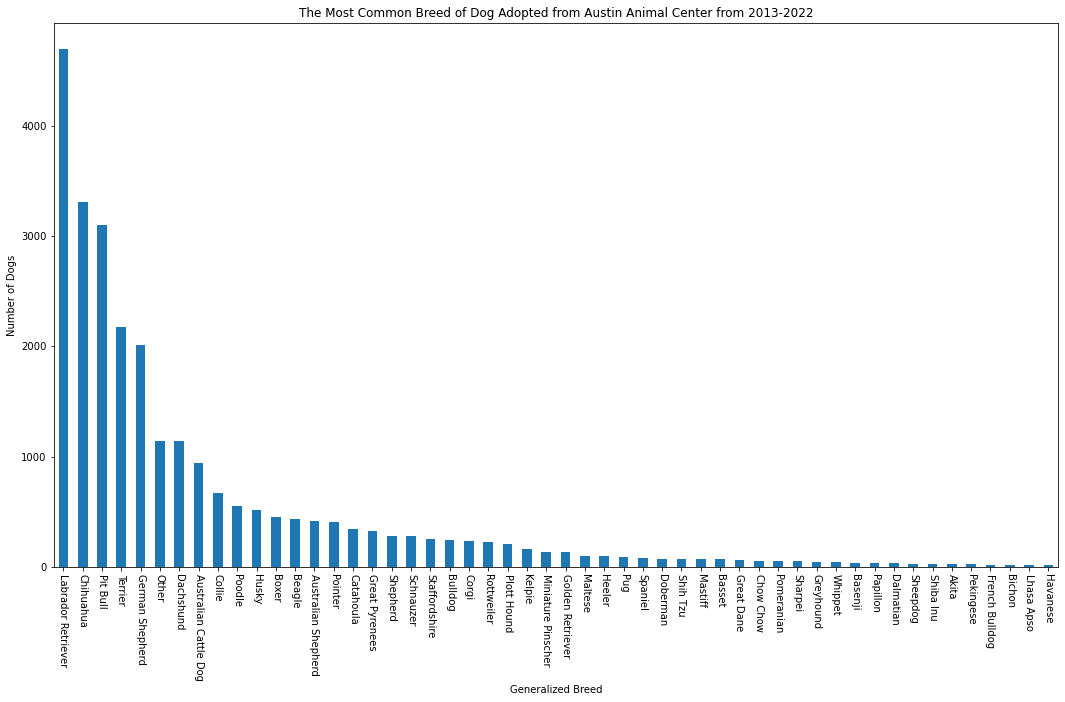

In [30]:
dogs_nodups[dogs_nodups['Outcome Type']=='Adoption']['breed_category'].value_counts().plot.bar(figsize=(18,10))
plt.xticks(rotation=270)
plt.title('The Most Common Breed of Dog Adopted from Austin Animal Center from 2013-2022')
plt.ylabel('Number of Dogs')
plt.xlabel('Generalized Breed')
plt.show()

#### 3.3.5 Clean the 'Name' column

Changing unknown values for name to 'Unknown'. We do not want to remove this column entirely as the name may have a relation to the speed that it is adopted.


In [31]:
dogs_nodups['Name'].isnull().sum()

12081

In [32]:
dogs_nodups['Name'].fillna('Unknown')

0         *Brock
1          Belle
2        Runster
3            Rio
4           Odin
          ...   
55932       Mele
55933        Blu
55934      Taffy
55935      Layla
55936       Jack
Name: Name, Length: 55886, dtype: object

#### 3.3.6 Remove unnecessary columns from the final DataFrame


In [33]:
dogs_nodups.columns

Index(['Animal ID', 'Name', 'DateTime_intake', 'MonthYear_intake',
       'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type',
       'Sex upon Intake', 'Age upon Intake', 'Breed', 'Color',
       'DateTime_outcome', 'MonthYear_outcome', 'Date of Birth',
       'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome',
       'Age upon Outcome', 'dt_intake', 'dt_outcome', 'delta_time',
       'month_outcome', 'year_outcome', 'delta_time_s', 'delta_time_d',
       'age_td', 'age_in_days', 'age_in_years', 'breed_category'],
      dtype='object')

In [34]:
col_list = ['Animal ID', 'Name', 'breed_category', 'Sex upon Intake', 'Sex upon Outcome', 'Intake Type', 
            'Intake Condition', 'dt_intake', 'Outcome Type', 'dt_outcome', 'delta_time', 'delta_time_d', 
            'age_in_years', 'month_outcome', 'year_outcome']
col_map = {'Animal ID':'id', 'Name':'name', 'Sex upon Intake':'sex_intake', 'Intake Condition':'condition_intake',
          'Outcome Type':'outcome', 'Sex upon Outcome':'sex_outcome', 'Intake Type':'intake_type'}
final_dogs = dogs_nodups[col_list]
final_dogs = final_dogs.rename(columns=col_map)
final_dogs = final_dogs[final_dogs['sex_outcome']!='Unknown']

In [35]:
final_dogs.head()

,id,name,breed_category,sex_intake,sex_outcome,intake_type,condition_intake,dt_intake,outcome,dt_outcome,delta_time,delta_time_d,age_in_years,month_outcome,year_outcome
0,A786884,*Brock,Beagle,Neutered Male,Neutered Male,Stray,Normal,2019-01-03 16:19:00,Transfer,2019-01-08 15:11:00,4 days 22:52:00,4.952778,2.0,1,2019
1,A706918,Belle,Spaniel,Spayed Female,Spayed Female,Stray,Normal,2015-07-05 12:59:00,Return to Owner,2015-07-05 15:13:00,0 days 02:14:00,0.093056,8.0,7,2015
2,A724273,Runster,Basenji,Intact Male,Neutered Male,Stray,Normal,2016-04-14 18:43:00,Return to Owner,2016-04-21 17:17:00,6 days 22:34:00,6.940278,1.0,4,2016
3,A682524,Rio,Doberman,Neutered Male,Neutered Male,Stray,Normal,2014-06-29 10:38:00,Return to Owner,2014-07-02 14:16:00,3 days 03:38:00,3.151389,4.0,7,2014
4,A743852,Odin,Labrador Retriever,Neutered Male,Neutered Male,Owner Surrender,Normal,2017-02-18 12:46:00,Return to Owner,2017-02-21 17:44:00,3 days 04:58:00,3.206944,2.0,2,2017


### 3.4 Basic Data Visualization

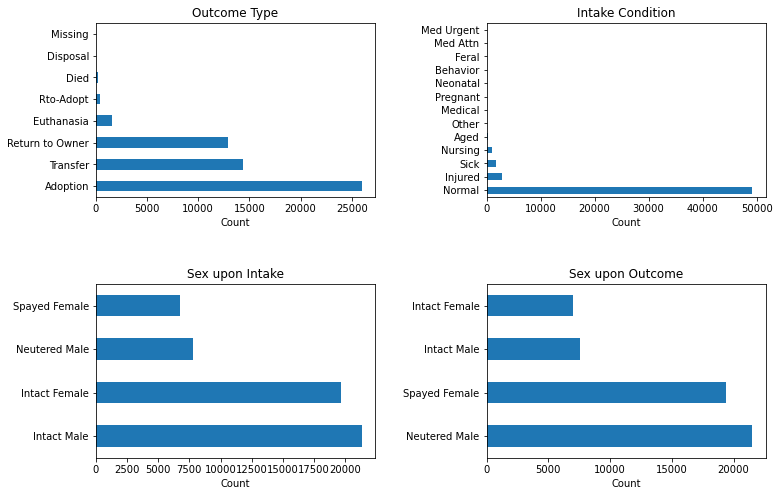

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
final_dogs['outcome'].value_counts().plot(kind='barh', ax=ax[0,0])
ax[0,0].set_title('Outcome Type')
ax[0,0].set_xlabel('Count')
final_dogs['condition_intake'].value_counts().plot(kind='barh', ax=ax[0,1])
ax[0,1].set_title('Intake Condition')
ax[0,1].set_xlabel('Count')
final_dogs['sex_intake'].value_counts().plot(kind='barh', ax=ax[1,0])
ax[1,0].set_title('Sex upon Intake')
ax[1,0].set_xlabel('Count')
final_dogs['sex_outcome'].value_counts().plot(kind='barh', ax=ax[1,1])
ax[1,1].set_title('Sex upon Outcome')
ax[1,1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.4,hspace=0.5);

In [37]:
adoption_by_sex = pd.DataFrame(final_dogs.groupby(['outcome', 'sex_outcome'])[['id']].count())
adoption_by_sex


id
outcome         sex_outcome         
Adoption        Intact Female    384
                Intact Male      355
                Neutered Male  12701
                Spayed Female  12523
Died            Intact Female     87
                Intact Male       90
                Neutered Male     36
                Spayed Female     25
Disposal        Intact Female     10
                Intact Male       21
                Neutered Male      1
                Spayed Female      1
Euthanasia      Intact Female    437
                Intact Male      505
                Neutered Male    370
                Spayed Female    226
Missing         Intact Female      5
                Intact Male        8
                Neutered Male      2
                Spayed Female      3
Return to Owner Intact Female   1899
                Intact Male     2768
                Neutered Male   4677
                Spayed Female   3592
Rto-Adopt       Intact Female     15
                Intact Male       22
                Neutered Male    188
                Spayed Female    131
Transfer        Intact Female   4184
                Intact Male     3784
                Neutered Male   3542
                Spayed Female   2853

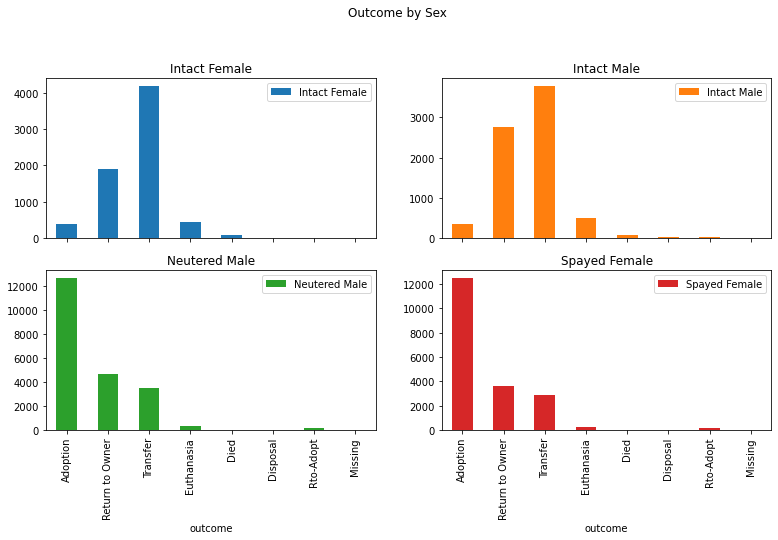

In [38]:
category_list = ['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 
                  'Died', 'Disposal', 'Rto-Adopt', 'Missing']
adoption_by_sex.unstack().loc[category_list].plot(y='id', kind='bar', figsize=(13, 10), title='Outcome by Sex', 
                               legend = True, subplots=True, layout = (3,2))
plt.xticks(rotation=90)
plt.show()

In [39]:
time = final_dogs['delta_time']
dogs_time_df = pd.DataFrame({'time_day':[x.total_seconds()/86400 for x in time]})
dogs_time_df = dogs_time_df.reset_index(drop=True)
final_dogs = final_dogs.reset_index(drop=True)
dogs_time_df = pd.concat([dogs_time_df, final_dogs[['id', 'age_in_years', 'delta_time', 
                                                    'sex_outcome', 'condition_intake']]], axis=1)

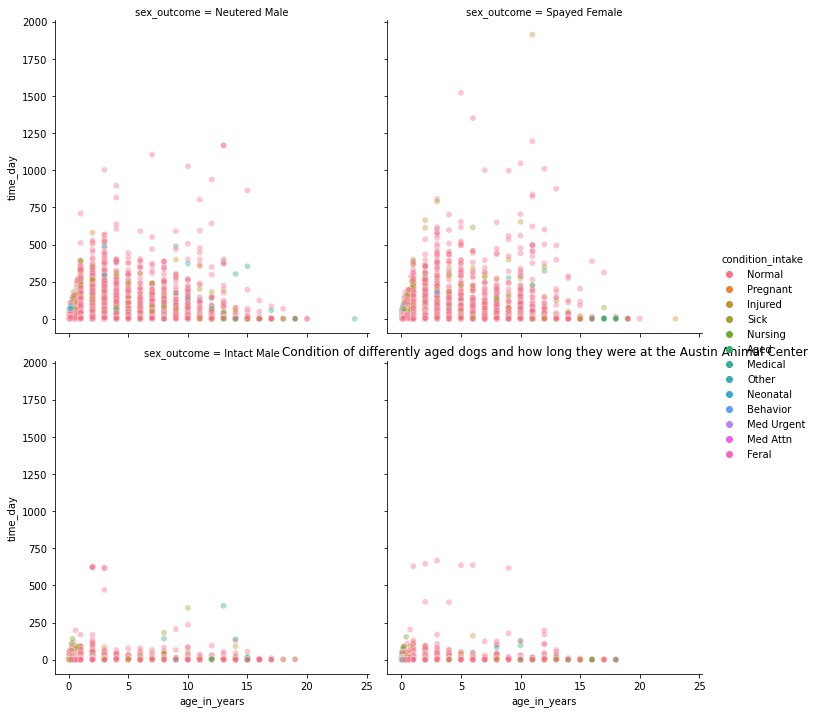

In [40]:
sns.relplot(x='age_in_years',
           y='time_day', 
           data=dogs_time_df,
           kind='scatter',
           col='sex_outcome',
           col_wrap=2,
           alpha=0.4,
           hue='condition_intake',
           col_order=['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female'])
plt.title('Condition of differently aged dogs and how long they were at the Austin Animal Center')
plt.show()


In [41]:
final_dogs[dogs_time_df['time_day']>0][['id', 'delta_time', 'dt_intake', 'dt_outcome']] \
    .sort_values('delta_time', ascending=False).head()

,id,delta_time,dt_intake,dt_outcome
22279,A642712,1912 days 22:31:00,2016-01-05 11:37:00,2021-04-01 10:08:00
8526,A722987,1521 days 23:31:00,2016-03-24 16:59:00,2020-05-24 16:30:00
17988,A737705,1351 days 20:20:00,2016-11-02 20:15:00,2020-07-16 16:35:00
17888,A778611,1195 days 00:06:00,2018-08-17 14:37:00,2021-11-24 14:43:00
24549,A769485,1167 days 19:55:00,2018-04-05 14:39:00,2021-06-16 10:34:00


From the data above, we can see that some dogs have stayed in the shelter for extremely long periods of time. The longest being dog animal id A642712, an injured female Pitbull named Patches, was at the Austin Animal Center for 5 years before being adopted out.


Next we plot the different outcome types by month to see if, for example, higher rates of adoptions happen in specific months.

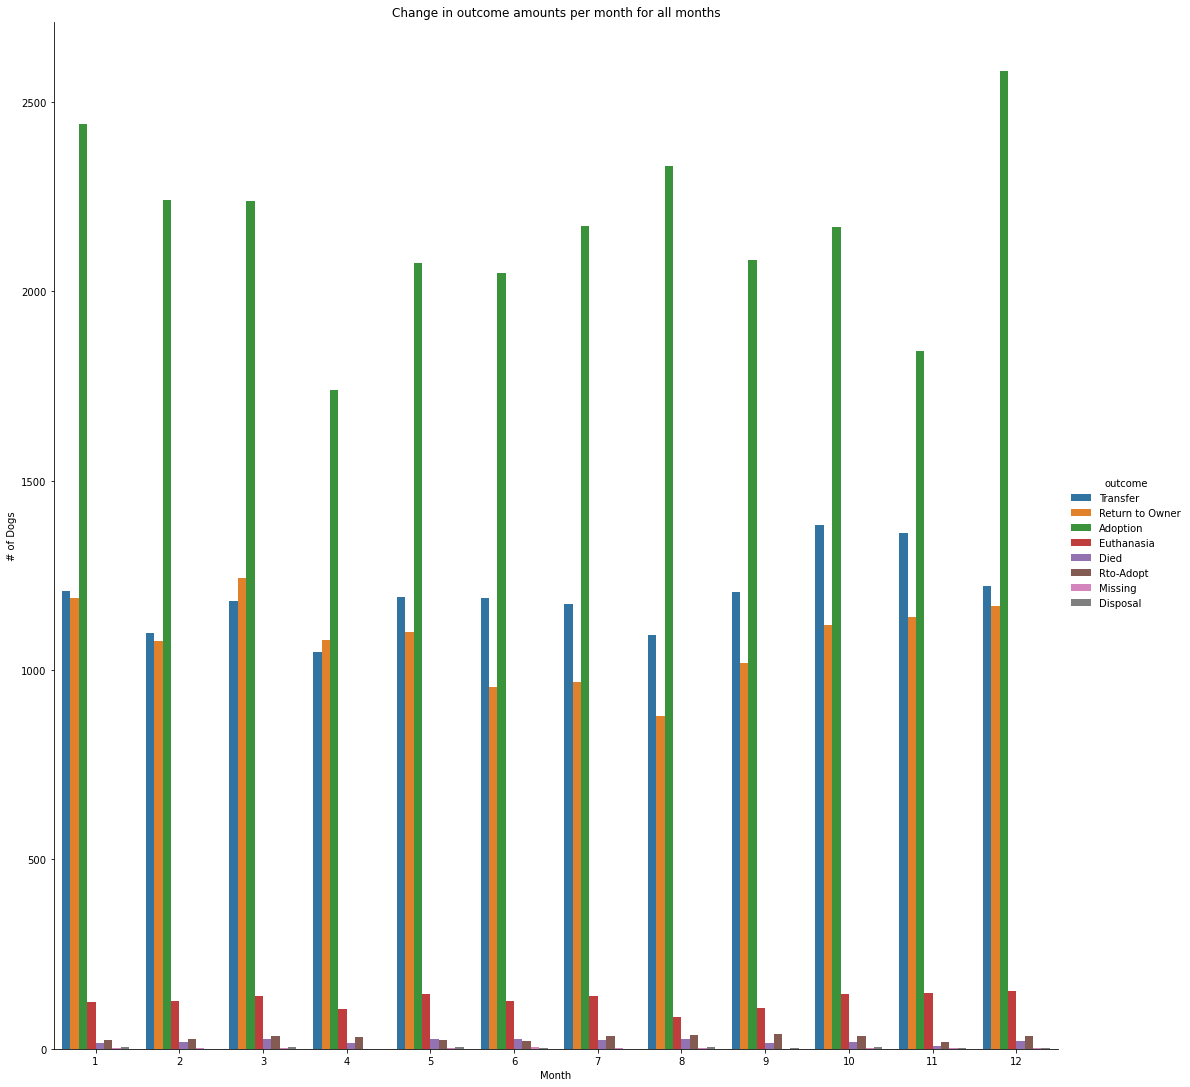

In [42]:
sns.catplot(x = 'month_outcome', hue='outcome', data=final_dogs, kind='count', height=15, aspect=1)
plt.title('Change in outcome amounts per month for all months')
plt.ylabel('# of Dogs')
plt.xlabel('Month')
plt.show()

In [43]:
def plotmonth(month):
    order_list = ['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 
                  'Died', 'Missing', 'Disposal', 'Rito-Adopt']
    month_dict = {1:'January', 2:'February', 3:'March', 4:'April', 
                  5:'May', 6:'June', 7:'July', 8:'August', 
                  9:'September', 10:'October', 11:'November', 12:'December'}
    data = final_dogs[final_dogs['month_outcome'] == month]
    sns.catplot(x='outcome', data=data, kind='count', order=order_list)
    plt.xticks(rotation=90)
    plt.ylim(0, 2800)
    plt.title(f'Change in outcome rates per month (Current Month : {month_dict.get(month)})')
    plt.show()


In [44]:
interact(plotmonth,month=widgets.IntSlider(min=1, max=12, step=1, value=1))

interactive(children=(IntSlider(value=1, description='month', max=12, min=1), Output()), _dom_classes=('widget…

<function __main__.plotmonth(month)>

Using the slider above to view the changes in outcome rates per month, we can see that both January and December have the highest adoption rates, while the other columns show no significant change.

Finally, we plot the Adoption counts per year for the Austin Animal Center and we can see a spike of adoptions in 2019, but a large decrease the following year in 2020. The year 2013 was omitted from the plot due to incomplete data since the data began collection in October 2013.

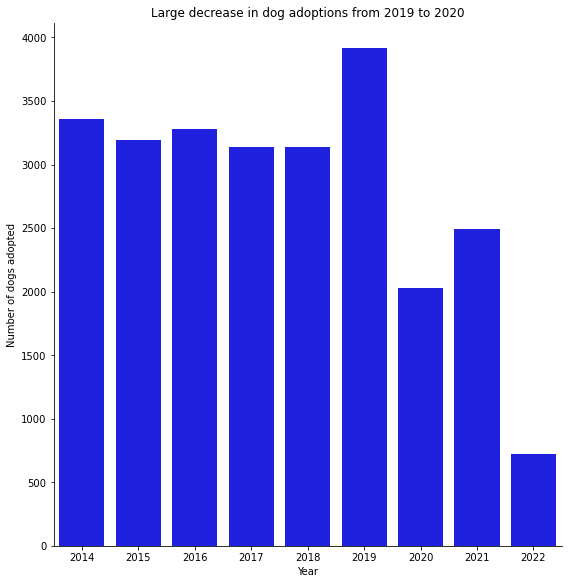

In [45]:
year_dog = final_dogs[final_dogs['outcome']=='Adoption']
year_dog = year_dog[year_dog['year_outcome']>2013]
sns.catplot(x='year_outcome', data=year_dog, kind='count', height=8, color='blue')
plt.title('Large decrease in dog adoptions from 2019 to 2020')
plt.xlabel('Year')
plt.ylabel('Number of dogs adopted')
plt.show()

## 4. Saving the Data

Use the pandas.DataFrame.to_csv() function to save our cleaned DataFrame as a csv file to import into the next step.

In [46]:
final_dogs = final_dogs.reset_index(drop=True)
final_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55445 entries, 0 to 55444
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                55445 non-null  object         
 1   name              43726 non-null  object         
 2   breed_category    55445 non-null  object         
 3   sex_intake        55445 non-null  object         
 4   sex_outcome       55445 non-null  object         
 5   intake_type       55445 non-null  object         
 6   condition_intake  55445 non-null  object         
 7   dt_intake         55445 non-null  datetime64[ns] 
 8   outcome           55445 non-null  object         
 9   dt_outcome        55445 non-null  datetime64[ns] 
 10  delta_time        55445 non-null  timedelta64[ns]
 11  delta_time_d      55445 non-null  float64        
 12  age_in_years      55445 non-null  float64        
 13  month_outcome     55445 non-null  int64          
 14  year_o

In [47]:
final_dogs.to_csv('../clean_data/austin_dogs_clean.csv')